# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
# Print out all columns
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [7]:
# Basic dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [8]:
# Number of black and white-sounding names
black = data[data['race'] == 'b']
white = data[data['race'] == 'w']
print('The number of black-sounding names is ' + str(len(black)))
print('The number of white-sounding names is ' + str(len(white)))

The number of black-sounding names is 2435
The number of white-sounding names is 2435


In [9]:
# Find the percentage of both black and white-sounding names that received callbacks.
percent_black = sum(data[data.race=='b'].call) / len(black)
percent_white = sum(data[data.race=='w'].call) / len(white)
print('The percentage of black-sounding names that received a call back: ' + str(percent_black))
print('The percentage of white-sounding names that received a call back: ' + str(percent_white))

The percentage of black-sounding names that received a call back: 0.06447638603696099
The percentage of white-sounding names that received a call back: 0.09650924024640657


The above calculations suggest that white-sounding names receive callbacks at a higher rate than black-sounding names - 9.65% vs 6.45%, respectively. White-sounding names receive almost 50% more calls than black-sounding names. 

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## 1) What test is appropriate for this problem? Does CLT apply?

This data is in the form of Bernoulli or binomial distribution since the data is given the form of success or failure. Or in this case, it's in the form of receiving a callback vs not receiving a callback. The appropriate test would be a two sample t test because we are considering two different types of data. A z test would not be as appropriate because we would have to assume a standard deviation of one of the two columns of data. 


CLT, or Central Limit Theorem, would apply because: 
1. the data is collected through random sampling
2. the dataset is larger than or equal to 30.. 
3. (np, (n(1-p)) is greater than or equal to 5, where n is the sample size and p is the probablility success.

In [10]:
# Define the number calls for each group
w = data[data.race=='w']
b = data[data.race=='b']
b_calls = b.call
w_calls = w.call

In [88]:
# Emperical cumulative distribution function
def ecdf(data):
    """Computes the Empirical Cummulative Distribution of a 1-dimensional numerical array"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y 

In [125]:
# Find the mean, std, and random normally distributed total call data to use for the theoretical CDF
mean = np.mean(data.call)
std = np.std(data.call)
norm = np.random.normal(mean, std, 10000)

# Do the same for black and white calls
# Black calls
mean_b = np.mean(b_calls)
std_b = np.std(b_calls)
norm_b = np.random.normal(mean_b, std_b, 10000)

# White calls
mean_w = np.mean(w_calls)
std_w = np.std(w_calls)
norm_w = np.random.normal(mean_w, std_w, 10000)

In [127]:
# ECDF of the total call data and both black and white-sounding names
x_theor, y_theor = ecdf(norm)
x_b, y_b = ecdf(norm_b)
x_w, y_w = ecdf(norm_w)

Text(0, 0.5, 'CDF')

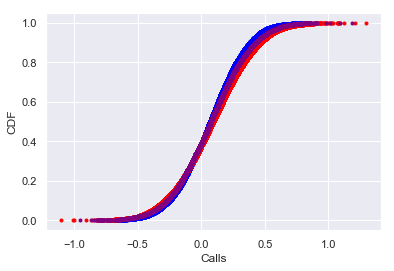

In [130]:
# PLot the ECDF of both the call dataset and the theoretical CDF
sns.set()
_ = plt.plot(x_b, y_b, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_w, y_w, marker='.', linestyle='none', color='red')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none', color='purple')
plt.xlabel('Calls')
plt.ylabel('CDF')

The plot of the ecdf of the total calls against the ecdfs of calls received by both black and white sounding names suggests
that mean of callbacks for black-sounding names  is lower than that of white-sounding names. The latter have a higher mean 
than that of the total calls, which is expected given that there are only two groups in the total. 

## 2) What are the null and alternate hypotheses?

The null hypothesis assumes that resumes of people with black and white-sounding names will receive the same percentage of callbacks. 

The alternative hypothesis is that there is a significant difference between the percentage of callbacks that black and white-sounding names receive. We'll use a 95% confidence interval to determine whether we should reject the null hypothesis.

In [7]:
# Your solution to Q3 here

## 3) Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### Bootstrap approach

In [41]:
# Bootstrap replicate function
def draw_bs_replicates(data, func, size=1):
    """Computes the bootstrap replicate(s) of a 1-dimensional numerical array"""
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample)
        
    return bs_replicates

In [43]:
# Import the t test for two independent samples from scipy
from scipy.stats import ttest_ind

In [81]:
# To find the p-value, we need to generate shifted arrays 

# Find the mean of the total calls
total_mean = np.mean(data.call)

# Shift both arrays
b_shift = b_calls - np.mean(b_calls) + total_mean
w_shift = w_calls - np.mean(w_calls) + total_mean

In [106]:
# Draw 10000 samples for both black and white-sounding names, as well as replicates that don't select by race.
b_bs_repsa = draw_bs_replicates(data[data.race=='b'].call, np.mean, 10000)
w_bs_repsa = draw_bs_replicates(data[data.race=='w'].call, np.mean, 10000)
t_bs_repsa = draw_bs_replicates(data.call, np.mean, 10000)

In [82]:
# Draw 10000 samples for both black and white-sounding names, as well as replicates that don't select by race.
b_bs_reps = draw_bs_replicates(b_shift, np.mean, 10000)
w_bs_reps = draw_bs_replicates(w_shift, np.mean, 10000)

In [109]:
# Compute the difference in means between black and white replicates
diff_bs_reps = w_bs_reps - b_bs_reps

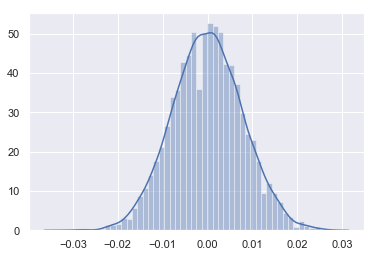

In [121]:
# Plot the difference in replicates for black and white values
sns.distplot(diff_bs_reps)

The above graph is shifted slightly to the right of 0.00. If there was no difference between the means of black and white 
calls, the distribution would be centered with respect to 0.00. 

In [110]:
# 95% condfidence interval
conf_int_bs = np.percentile(diff_bs_reps, [2.5, 97.5])
print('The 95% confidence interval for the bootstrap method is ' + str(conf_int_bs))

The 95% confidence interval for the bootstrap method is [-0.0151951   0.01560573]


In [61]:
# To find the p-value, we need to generate shifted arrays 

# Find the mean of the total calls
total_mean = np.mean(data.call)

# Shift both arrays
b_shift = b_calls - np.mean(b_calls) + total_mean
w_shift = w_calls - np.mean(w_calls) + total_mean

# Find the empirical difference of means
emp_diff_means = np.mean(b_calls) - np.mean(w_calls)

In [80]:
# p-value
p = np.sum(diff_bs_reps <= emp_diff_means) / len(diff_bs_reps)
print('The p-value for the bootstrap method is ' + str(p))

The p-value for the bootstrap method is 0.0


In [119]:
# For margin of error, we'll use the formula t.ppf(0.95, deg_free) * std_bw * ((1/nb + 1/nw) ** (1/2)),  where  std_bw
# is the standard  deviation the black and white call datasets together and nb and nw are the number of values 
# in both datasets. 

#Import t from scipy
from scipy.stats import t

nb = 2435
nw=2435
stdb = np.std(b_shift)
stdw = np.std(w_shift)

# degrees of freedom = 2435 + 2435 -2
deg_free = 4868

std_bw = (((nb - 1)*(stdb)**2 + (nw - 1)*(stdw)**2) / deg_free) ** (1/2)

moe_bs = t.ppf(0.95, deg_free) * std_bw * (((1/nb) + (1/nw)) ** (1/2))
print('The margin of error for the bootstrap method is ' + str(moe_bs))

The margin of error for the bootstrap method is 0.012804849890893049


### Frequentist approach

In [75]:
# 95% confidence interval
mean = np.mean(data.call)
std = np.std(data.call)
norm = np.random.normal(mean, std, 10000)

In [105]:
# 95% Confidence interval for the frequentist approach
conf_int_freq = np.percentile(norm, [2.5, 97.5])
print('The confidence interval for the frequentist method is ' + str(conf_int_freq))

The confidence interval for the frequentist method is [-0.45478851  0.62154141]


In [104]:
# Calculate the t-value and p-value
t_val, p_val = ttest_ind(b_calls, w_calls, axis=0, equal_var=False)
print('The t-value for the frequentist method is ' + str(t_val))
print('The p-value for the frequentist method is ' + str(p_val))

The t-value for the frequentist method is -4.114705290861751
The p-value for the frequentist method is 3.942941513645935e-05


In [118]:
# Margin of error

nb = 2435
nw=2435
stdb = np.std(b_calls)
stdw = np.std(w_calls)

# degrees of freedom = 2435 + 2435 -2
deg_free = 4868

std_bw = (((nb - 1)*(stdb)**2 + (nw - 1)*(stdw)**2) / deg_free) ** (1/2)

moe_bs = t.ppf(0.95, deg_free) * std_bw * (((1/nb) + (1/nw)) ** (1/2))
print('The margin of error for the frequentist method is ' + str(moe_bs))

The margin of error for the frequentist method is 0.012804839763683835


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

## 4) Write a story describing the statistical significance in the context or the original problem.

The p-values and confidence intervals for both approaches are different because of what was being tested with method. For the bootstrap approach, we were more concerned with the mean of the calls of both black and white-sounding names, whereas with the frequentist approach we were more concerned with the frequency with which both types of names received callbacks. As a result, the bootstrap confidence is much narrower than that of the frequentist approach.

The p-value, regardless of the approach used is well below the 95% confidence interval threshold. Therefore, we must reject 
the null hypothesis that there is no difference between the frequency of callbacks black and white-sounding names receive. 
In fact, given the difference in percentage between the calls received (with white-sounding names receiving 50% more calls than black-sounding names) as well as the difference in the means, it is highly likely that white-sounding names receive a higher frequency of calls than black-sounding names.

## 5) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No, the analysis does not claim that race is the most important factor in callback success. It is certainly a factor, given the above results, but we can't claim much more than that. Due to the variety of other columns in the dataset, we can't rule out that other factors such as gender, education, experience, and skills may have played a significant role. 

To determine if other factors played a role, similar analysis would have to be done on several of the other variables in the dataset in order to determine whether they also could have played a role in callbacks. Such an an analysis would have to include whether there is a correlation between those other factors and callbacks and perhaps even between race and those other factors. If that shows that there is statistical significance with regard to some of those other variables, we may have to rethink how important race is overall in relationship to callbacks. It may be the case that while race is an important factor, it may not be the only variable that influences callbacks. 